In [3]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [5]:
diabetes = load_diabetes()
df = pd.DataFrame(
    data=np.c_[diabetes["data"], diabetes["target"]],
    columns=diabetes["feature_names"] + ["target"],
)

In [6]:
X = df.iloc[:, :-1].to_numpy(dtype="float32")
y = df.iloc[:, -1:].to_numpy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
tree1 = DecisionTreeRegressor()

In [25]:
tree1.fit(X_train, y_train)

DecisionTreeRegressor()

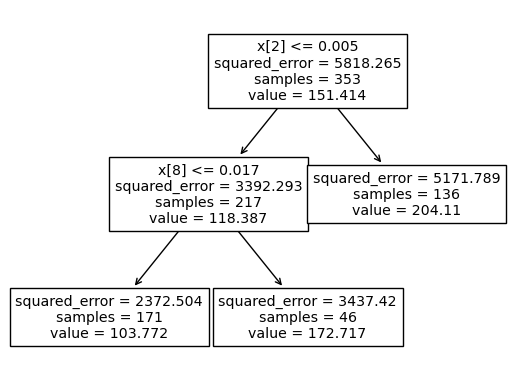

In [10]:
tree.plot_tree(tree1)
plt.show()

### Implementation of functions

In [26]:
def calc_obs_distribution(tree, X_train, y_train):
    """
    Function to calculate the distribution of observations in the leaf nodes of a tree-model
    Input:
        param tree: Fitted DecisionTreeRegressor
        param X_train: Training samples used for fitting
        param y_train: Training observations
    Output:
        leaf_nodes: Ordered numerical array with index of leaf nodes
        y_values_leaves: List of arrays with y_values that fall into each leaf node (same order as leaf_nodes)
        X_values_leaves: List of arrays with X_values that fall into each leaf node (same order as leaf_nodes)
        X_ids_leaves: List of arrays that determine whether a training input is in a leaf or not.
                      Length of number of leaves
        weights_leaves: List of arrays with the weights of the training obs dependent on leaf

    """
    # Calculate index of the leaf that each sample is predicted as
    leaf_id_train = tree.apply(X_train)

    # Get ids of leaf sorted
    leaf_nodes = np.unique(leaf_id_train)

    # Get list of boolean arrays with information on what observation is in which leaf
    X_ids_leaves = []
    for i in leaf_nodes:
        X_ids_leaves.append(leaf_id_train == i)

    # Get list of what observation values are in which leaf
    y_values_leaves = []
    for i in range(len(X_ids_leaves)):
        y_values_leaves.append(y_train[X_ids_leaves[i]].flatten())

    # Get list of what input values are in which leaf
    X_values_leaves = []
    for i in range(len(X_ids_leaves)):
        X_values_leaves.append(X_train[X_ids_leaves[i]])

    # Get list of weights of train obs of each leaf
    weights_leaves = []
    for i in range(len(X_ids_leaves)):
        weights_true = 1 / np.sum(X_ids_leaves[i])
        help_matrix = X_ids_leaves[i].astype(int)
        help_matrix = help_matrix.astype(float)
        help_matrix[help_matrix == 1] = weights_true
        weights_leaves.append(help_matrix)

    return leaf_nodes, y_values_leaves, X_values_leaves, X_ids_leaves, weights_leaves

In [27]:
(
    leaf_nodes,
    y_values_leaves,
    X_values_leaves,
    X_ids_leaves,
    weights_leaves,
) = calc_obs_distribution(tree1, X_train, y_train)

In [39]:
def calc_mean_observation_tree(tree, X_test, y_train, leaf_nodes, weights_leaves):
    """
    Calculate weights of a tree and mean prediction based on a Out-Of_Sample Dataset

    input:
        param tree: Fitted DecisionTreeRegressor
        param X_test: OOS Dataset
        param y_train: observations used to build tree
        param leaf_nodes: List of length number_leaf_nodes with arrays with leaf_node indexes
        param weights_leaves: List of length number_leaf_nodes with weights of individual leaf nodes

    output:
        mean_preds: List of mean predictions of tree
        weights: List of weights used to calculate mean_preds
    """
    #  Calculate index of the leaf that each sample is predicted as
    X_test_id_leaves = tree.apply(X_test)

    mean_preds = []
    weights = []
    for i in range(len(X_test_id_leaves)):
        X_id = X_test_id_leaves[i]
        index = np.where(leaf_nodes == X_id)[0][0]  # Calculate index of test

        # Calculate mean through sum(weights * y_train)
        weights.append(weights_leaves[index])
        mean = np.dot(weights_leaves[index], y_train)[0]
        mean_preds.append(mean)

    return mean_preds, weights

In [40]:
means, weights = calc_mean_observation_tree(
    tree1, X_test, y_train, leaf_nodes, weights_leaves
)

In [44]:
y_train.shape

(353, 1)

In [31]:
test = tree1.predict(X_test)

In [32]:
test.shape

(89,)

In [33]:
means == test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [350]:
def calc_empirical_dist_tree(tree, X_test, y_train, leaf_nodes, weights_leaves):
    #  Calculate index of the leaf that each sample is predicted as
    X_test_id_leaves = tree.apply(X_test)
    
    empirical_dist = []
    for i in range(len(X_test_id_leaves)):
        X_id = X_test_id_leaves[i]
        index = np.where(leaf_nodes == X_id)[0][0]  # Calculate index of test
        
        for j in range(len(y_train)):
            dist = 
            

In [351]:
def calc_obs_weight(X_test, tree, leaf_nodes, X_ids_leaves):
    """
    Calculates the weights w_i(x,θ) for each test value
    Input:
        param X_test: Array of test values
        param tree: Fitted DecisionTreeRegressor
        param leaf_nodes: Ordered numerical array with index of leaf nodes
        param X_ids_leaves: List of arrays that determine whether a training input is in a leaf or not

    Output:
        weights: List of arrays with the weights of the training observations
    """

    #  Calculate index of the leaf that each sample is predicted as
    X_test_id_leaves = tree.apply(X_test)

    weights = []
    for i in range(len(X_test_id_leaves)):
        X_id = X_test_id_leaves[i]
        index = np.where(leaf_nodes == X_id)[0][0]
        weights_true = 1 / np.sum(X_ids_leaves[index])
        help_matrix = X_ids_leaves[index].astype(int)
        help_matrix = help_matrix.astype(float)
        help_matrix[help_matrix == 1] = weights_true
        weights.append(help_matrix)

    return weights

In [352]:
weights = calc_obs_weight(X_test[0:3], tree1, leaf_nodes, X_ids_leaves)